In [1]:
import itertools

from numpy import loadtxt
from tensorflow.keras.models import load_model
import pickle
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# model_name="resnet34-1632051334.h5"
model = load_model('C:/Users/moham/Desktop/MyDeepLearningProject/transferLearning/ModelCheckPoints/VGG16-test-1-datagen-1633886654.h5', compile=True)
# model =load_model(model_name)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [2]:
dirpath='C:/Users/moham/Desktop/Data/breastImages'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    dirpath+'/test',
    target_size=(256, 256),
    batch_size=10,
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False
)



Found 423 images belonging to 3 classes.


In [3]:
X_test = pickle.load(open("C:/Users/moham/Desktop/MyDeepLearningProject/Datasets/cropped224/X_test.pickle", "rb"))
y_test = pickle.load(open("C:/Users/moham/Desktop/MyDeepLearningProject/Datasets/cropped224/y_test.pickle", "rb"))

countB=0
countC=0
countN=0
for i in y_test:
	if i==0:
		countB+=1
	elif i==1:
		countC+=1
	elif i==2:
		countN+=1
print("Total Benign="+str(countB))
print("Total Cancer="+str(countC))
print("Total Normal="+str(countN))
from tensorflow.keras.utils import to_categorical
X_test=X_test/255.0
y_test = to_categorical(y_test)
print(len(X_test))

Total Benign=280
Total Cancer=281
Total Normal=281
842


In [4]:
CAT=['Benign','Cancer','Normal']
# CAT=['CancerOrBenign','Normal']
# CAT=["Benign","Cancer"]
import matplotlib.pyplot as plt
import numpy as np
# myImageArray = X_test[20:21]
# plt.imshow(myImageArray[0])
# plt.show()
# myLabel = y_test[20:21]
# y_pred=(model.predict(X_test)>my_threshold).astype(int)
# print("Actual label: "+CAT[np.argmax(myLabel[0])])
# print("Actual label = "+CAT[myLabel[0]])
# preds=(model.predict(X_test)>my_threshold).astype(int)
# preds=model.predict(X_test[20:21])
# preds = np.argmax(preds[0])
# if preds[0]>=0.5:
# 	preds=1
# else:
# 	preds=0
# print("Predicted label: "+CAT[preds])

In [5]:
# CAT=['Benign','Cancer','Normal']
# CAT=['CancerOrBenign','Normal']
preds = model.predict(X_test)
preds=np.argmax(preds, axis=-1)
#
# preds = (model.predict(X_test)>=0.5).astype(int)
# preds=preds.ravel()

In [6]:
y_test_rounded=np.argmax(y_test, axis=1)
# y_test_rounded=y_test

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=y_test_rounded, y_pred=preds)

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
	plt.imshow(cm, interpolation='nearest', cmap=cmap)
	plt.title(title)
	plt.colorbar()
	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks,classes, rotation=45)
	plt.yticks(tick_marks,classes)

	if normalize:
		cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
		print("Normalized Confusion matrix")
	else:
		print("Confusion matrix, without normalization")

	print(cm)

	thresh = cm.max()/ 2.
	for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j,i,cm[i,j],
				 horizontalalignment="center",
				 color="white" if cm[i,j] > thresh else "black")

	plt.tight_layout()
	plt.ylabel('true label')
	plt.xlabel('predicted label')

Confusion matrix, without normalization
[[ 43 200  37]
 [ 34 210  37]
 [ 10 110 161]]


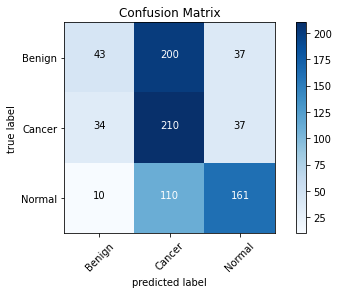

In [8]:
cm_plot_labels = CAT
plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title='Confusion Matrix')

In [9]:
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

27/27 [==============================] - 3s 81ms/step - loss: 4.4870 - accuracy: 0.4917

In [10]:
from sklearn import metrics
print(metrics.classification_report(y_true=y_test_rounded,y_pred=preds,digits=3))

              precision    recall  f1-score   support

           0      0.494     0.154     0.234       280
           1      0.404     0.747     0.524       281
           2      0.685     0.573     0.624       281

    accuracy                          0.492       842
   macro avg      0.528     0.491     0.461       842
weighted avg      0.528     0.492     0.461       842



In [11]:
from sklearn import metrics
print(metrics.classification_report(y_true=y_test_rounded,y_pred=preds,digits=3))


              precision    recall  f1-score   support

           0      0.494     0.154     0.234       280
           1      0.404     0.747     0.524       281
           2      0.685     0.573     0.624       281

    accuracy                          0.492       842
   macro avg      0.528     0.491     0.461       842
weighted avg      0.528     0.492     0.461       842



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: in user code:

    c:\users\moham\desktop\mydeeplearningproject\lib\site-packages\keras\engine\training.py:1544 predict_function  *
        return step_function(self, iterator)
    c:\users\moham\desktop\mydeeplearningproject\lib\site-packages\keras\engine\training.py:1527 run_step  *
        outputs = model.predict_step(data)
    c:\users\moham\desktop\mydeeplearningproject\lib\site-packages\keras\engine\training.py:1500 predict_step  *
        return self(x, training=False)
    c:\users\moham\desktop\mydeeplearningproject\lib\site-packages\keras\engine\base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\moham\desktop\mydeeplearningproject\lib\site-packages\keras\engine\input_spec.py:264 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 256, 256, 3), found shape=(None, 250, 250, 3)


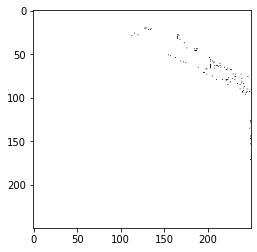

In [12]:
# from keras.applications.vgg16 import VGG16
  
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# from keras.models import load_model
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model1 = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape

img = load_img('C:/Users/moham/Desktop/Additional Unused testing images/test/Normal/A_0462_1.RIGHT_CC.png', target_size=(250, 250))
# convert the image to an array
img = img_to_array(img)
pyplot.imshow(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = img/255.
# get feature map for first hidden layer
feature_maps = model1.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			pyplot.savefig("feature maps of VGG for test image "+"new")
			ix += 1
	# show the figure

	pyplot.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# outputs = [model.layers[i].output for i in ixs]
model1 = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
layer_names = [layer.name for layer in model.layers]
img = load_img('C:/Users/moham/Desktop/Additional Unused testing images/test/Normal/A_0462_1.RIGHT_CC.png', target_size=(250, 250))
# convert the image to an array
img = img_to_array(img)
pyplot.imshow(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = img/255.
# get feature map for first hidden layer
feature_maps = model1.predict(img)
# plot the output from each block
layer_names = [layer.name for layer in model1.layers]
for layer_name, feature_map in zip(layer_names, feature_maps):
	if len(feature_map.shape) == 4:
		k = feature_map.shape[-1]
		size=feature_map.shape[1]
		for i in range(k):
			feature_image = feature_map[0, :, :, i]
			feature_image-= feature_image.mean()
			feature_image/= feature_image.std ()
			feature_image*=  64
			feature_image+= 128
			feature_image= np.clip(img, 0, 255).astype('uint8')
			image_belt[:, i * size : (i + 1) * size] = feature_image
			scale = 20. / k
			plt.figure( figsize=(scale * k, scale) )
			plt.title ( layer_name )
			plt.grid  ( False )
			plt.imshow( image_belt, aspect='auto')
			plt.show()